In [1]:
from util_comp import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import time

from sklearn.model_selection import train_test_split


# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(main(one_hot=True))
print(df.shape)
df.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 18 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 55 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 3 minutes and 27 seconds
(44535, 427)


,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_None,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_None,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_1000 to 4999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_5000 employees and more,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_None,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_None,)","(Would you say that over the last 12 months, your company's activity has:_nan,)","(Q9- Are you working?_Part time,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_None,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12-

In [3]:
data = df

# Split the data for training and evaluation
# X: features with the outcome column removed, where outcome is 0 or 1
# y: outcome column

# get the rows withs outcome 0 or 1
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome', axis=1, inplace=False)
X.columns = [str(i) for i in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test,score_func, k):
 fs = SelectKBest(score_func, k=k)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

### Chi Sq

Feature 0: 1.832396
Feature 1: 69.335076
Feature 2: 166.177314
Feature 3: 246.188361
Feature 4: 15.674149
Feature 5: 18.395946
Feature 6: 0.344340
Feature 7: 136.100189
Feature 8: 77.070106
Feature 9: 3.660020
Feature 10: 69.970443
Feature 11: 75.572437
Feature 12: 83.045311
Feature 13: 5.826096
Feature 14: 3.821871
Feature 15: 0.000134
Feature 16: 52.791420
Feature 17: 36.939867
Feature 18: 7.778719
Feature 19: 46.945047
Feature 20: 0.016057
Feature 21: 1.402251
Feature 22: 0.063549
Feature 23: 13.536127
Feature 24: 4.349277
Feature 25: 3.027103
Feature 26: 0.885057
Feature 27: 4.596518
Feature 28: 52.564244
Feature 29: 56.442028
Feature 30: 10.766346
Feature 31: 51.836796
Feature 32: 42.788208
Feature 33: 0.215756
Feature 34: 1.559404
Feature 35: 8.378285
Feature 36: 0.832299
Feature 37: 0.043742
Feature 38: 0.664268
Feature 39: 4.815574
Feature 40: 4.130530
Feature 41: 5.028894
Feature 42: nan
Feature 43: 23.247900
Feature 44: 3.060017
Feature 45: 11.906060
Feature 46: 6.468349
Feat

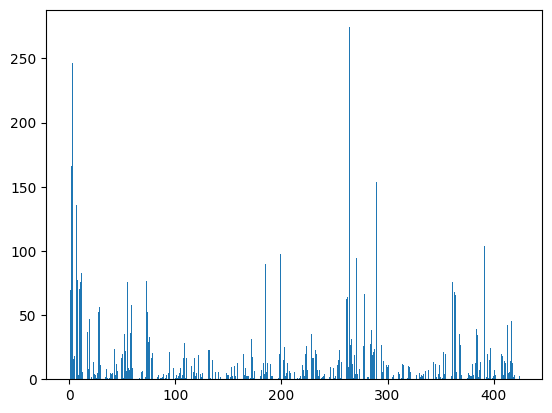

In [5]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


min: 0.0001336211450283463
max: 274.1891752752727


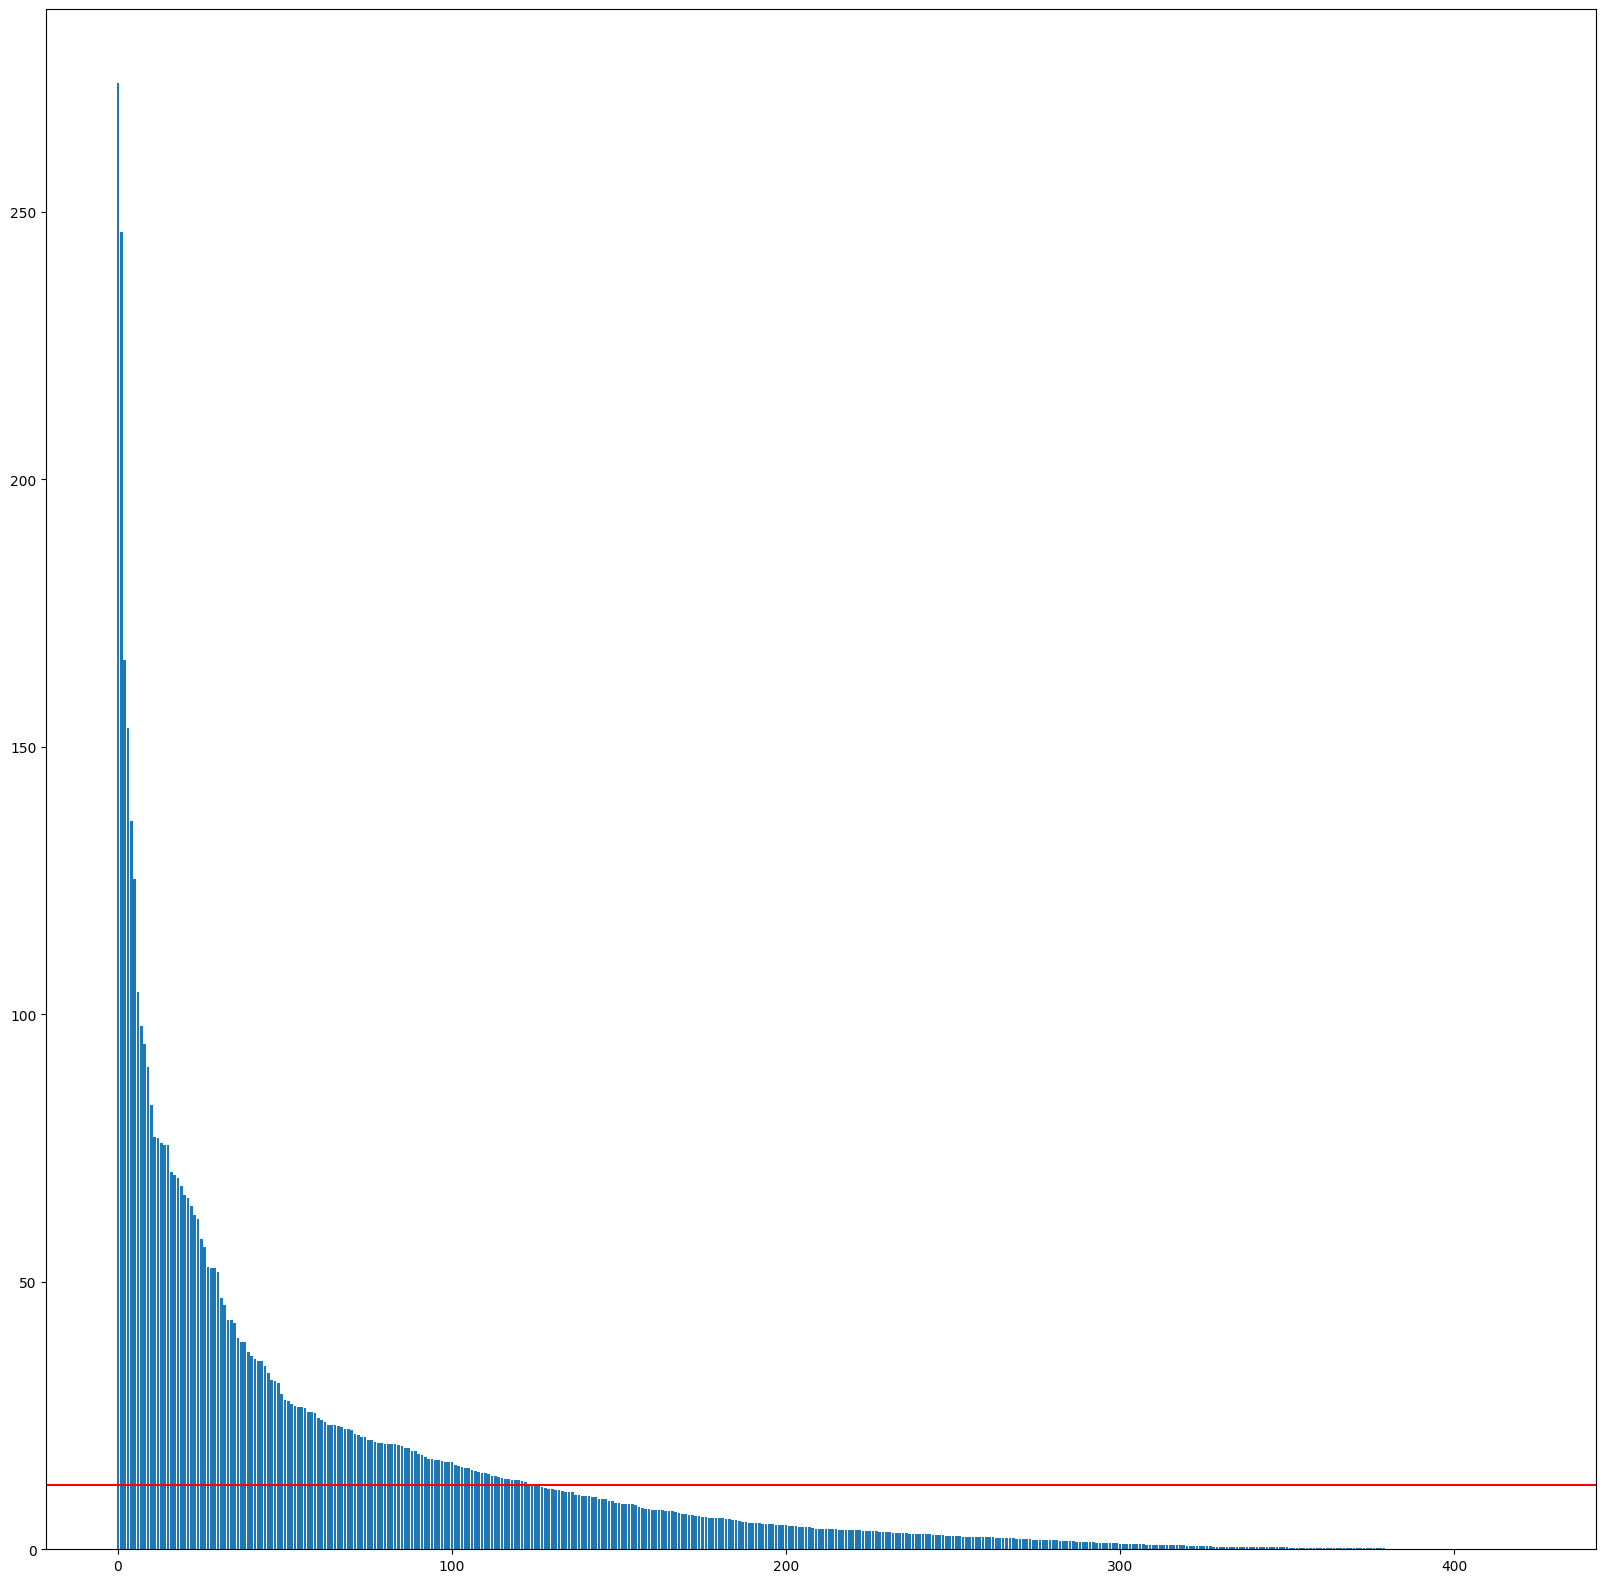

number of features with scores above the threshold: 126


In [6]:
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
print(f"min: {min(scores)}")
print(f"max: {max(scores)}")

# sort the scores in descending order
scores.sort(reverse=True)

# get the threshold

threshold = 12
# plot the scores
# draw a vertical line at the threshold
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold])
print(f"number of features with scores above the threshold: {num_features}")


In [7]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)

In [8]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.46209350741583727 
test accuracy: 0.8524 
train accuracy: 1.0000 
ROAUC: 0.7019063917279583 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.67      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.76      0.50      0.46      6959
weighted avg       0.83      0.85      0.78      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 3 seconds
average test accuracy: 0.8524213249030033


In [9]:
max2 = max(scores)
min2 = min(scores)
range2 =  max2 - min2
print(f"range: {range2}")

# get the threshold
threshold = min(scores) + range2 * 0.1
print(f"threshold: {threshold}")

range: 274.18904165412766
threshold: 27.419037786557798


In [10]:
threshold = min2 + (range2 * 0.1)
print(f"threshold: {threshold}")

threshold: 27.419037786557798


In [11]:
accuracy_scores = []
for i in range(1,21):
    print(f"{i}:\n")
    threshold = min2 + (range2 * 0.05 * i)
    print(f"Threshold: {threshold}")
    num_features = len([sc for sc in scores if sc > threshold])
    print(f"number of features with scores above the threshold: {num_features}")
    if num_features == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold,np.mean(test_accuracies)))

1:

Threshold: 13.709585703851413
number of features with scores above the threshold: 114
Forest 1/2 trained with 
F1 score: 0.46213727829907253 
test accuracy: 0.8526 
train accuracy: 1.0000 
ROAUC: 0.6926367722977668 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.46      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 3 seconds
Forest 2/2 trained with 
F1 score: 0.46213727829907253 
test accuracy: 0.8526 
train accuracy: 1.0000 
ROAUC: 0.6982516022455383 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.00      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50    

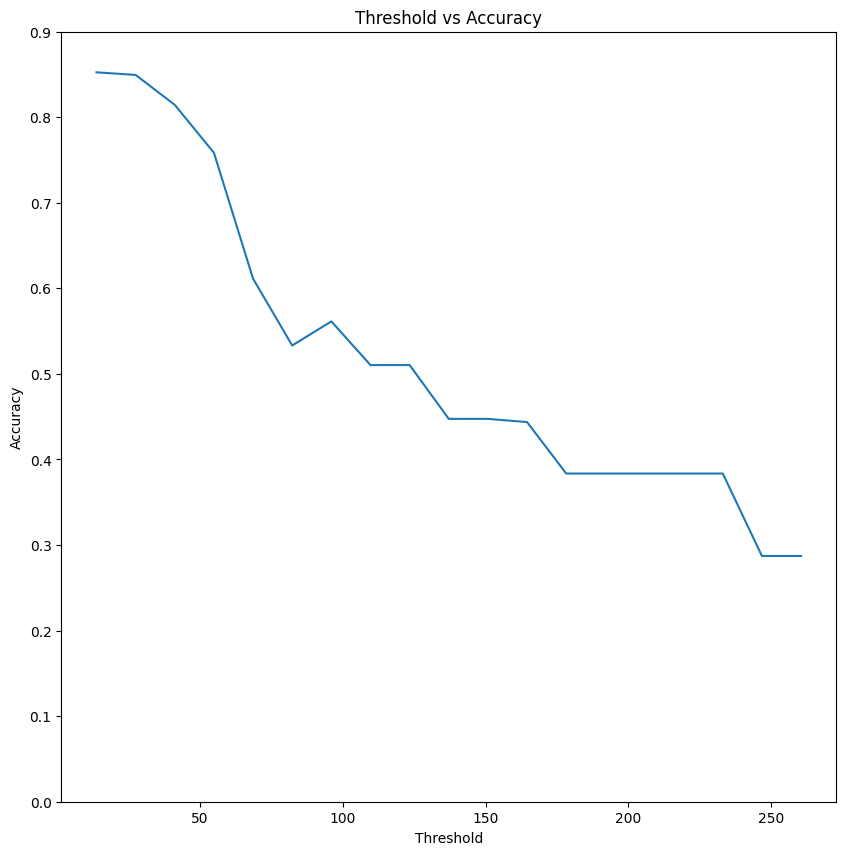

In [12]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
# plt.xticks(np.arange(min([i[0] for i in accuracy_scores]), max([i[0] for i in accuracy_scores])+0.1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [13]:
accuracy_scores = []
prev_num_feat = 0
th = 68
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= 1
        continue
    if th < 17:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((th,np.mean(test_accuracies)))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= 1

Threshold: 68
number of features with scores above the threshold: 19
Forest 1/2 trained with 
F1 score: 0.5204910547453314 
test accuracy: 0.6084 
train accuracy: 0.6518 
ROAUC: 0.6420968242440466 
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      5931
           1       0.21      0.61      0.32      1028

    accuracy                           0.61      6959
   macro avg       0.56      0.61      0.52      6959
weighted avg       0.80      0.61      0.67      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 1 seconds
Forest 2/2 trained with 
F1 score: 0.5224324968618037 
test accuracy: 0.6142 
train accuracy: 0.6602 
ROAUC: 0.6421731724166435 
              precision    recall  f1-score   support

           0       0.90      0.62      0.73      5931
           1       0.21      0.60      0.31      1028

    accuracy                           0.61      6959
   macro avg       0.56      0.61      0.52      6959
weight

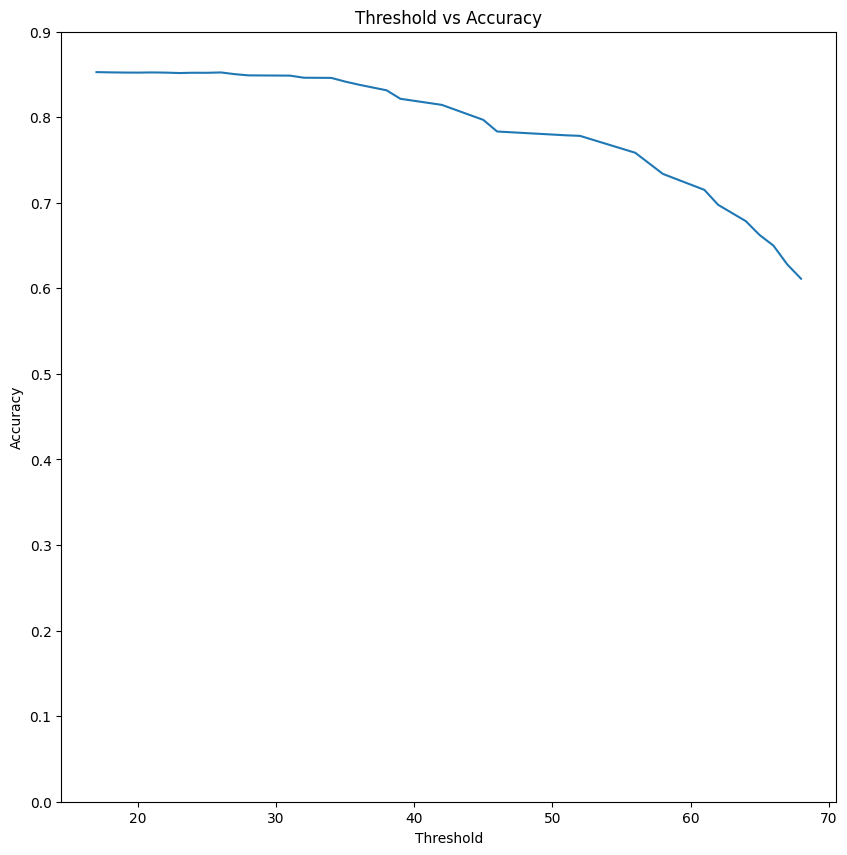

In [14]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

diff: 0.021985917516884612, accuracy: 0.6280356373042104, threshold: 67
diff: 0.01235809742779126, accuracy: 0.650021554821095, threshold: 66
diff: 0.01623796522488874, accuracy: 0.6623796522488863, threshold: 65
diff: 0.01904009196723666, accuracy: 0.678617617473775, threshold: 64
diff: 0.017531254490587678, accuracy: 0.6976577094410117, threshold: 62
diff: 0.018608995545337015, accuracy: 0.7151889639315994, threshold: 61
diff: 0.02471619485558274, accuracy: 0.7337979594769364, threshold: 58
diff: 0.019758586003736145, accuracy: 0.7585141543325191, threshold: 56
diff: 0.000646644632849469, accuracy: 0.7782727403362553, threshold: 52
diff: 0.0044546630262969344, accuracy: 0.7789193849691047, threshold: 51
diff: 0.013579537289840404, accuracy: 0.7833740479954017, threshold: 46
diff: 0.01753125449058779, accuracy: 0.7969535852852421, threshold: 45
diff: 0.007113090961344937, accuracy: 0.8144848397758299, threshold: 42
diff: 0.009915217703693191, accuracy: 0.8215979307371748, threshold: 3

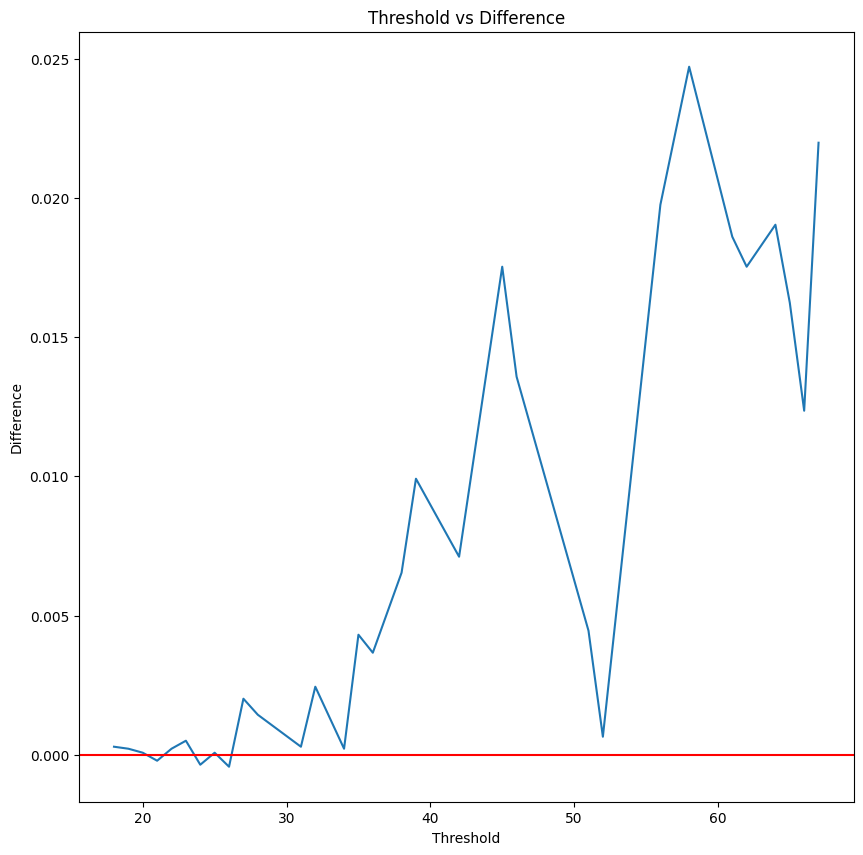

In [22]:
diff = []
for i in range(1,len(accuracy_scores)-1):
    dif = accuracy_scores[i+1][1] - accuracy_scores[i][1]
    print(f"diff: {dif}, accuracy: {accuracy_scores[i][1]}, threshold: {accuracy_scores[i][0]}")
    diff.append((dif,accuracy_scores[i][0]))

# plot the dif
plt.figure(figsize=(10,10))
plt.plot([i[1] for i in diff], [i[0] for i in diff])
# horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Difference')
plt.title('Threshold vs Difference')
plt.show()


### Mutual info class

Feature 0: 0.000277
Feature 1: 0.000455
Feature 2: 0.004632
Feature 3: 0.006872
Feature 4: 0.003352
Feature 5: 0.002279
Feature 6: 0.002342
Feature 7: 0.004104
Feature 8: 0.006458
Feature 9: 0.000000
Feature 10: 0.000711
Feature 11: 0.002465
Feature 12: 0.004451
Feature 13: 0.000000
Feature 14: 0.000226
Feature 15: 0.003273
Feature 16: 0.004086
Feature 17: 0.002351
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.004015
Feature 21: 0.000648
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.000000
Feature 27: 0.003311
Feature 28: 0.003596
Feature 29: 0.003644
Feature 30: 0.000000
Feature 31: 0.001521
Feature 32: 0.002530
Feature 33: 0.005674
Feature 34: 0.000000
Feature 35: 0.000566
Feature 36: 0.001922
Feature 37: 0.000000
Feature 38: 0.000000
Feature 39: 0.000000
Feature 40: 0.002349
Feature 41: 0.002373
Feature 42: 0.000000
Feature 43: 0.002364
Feature 44: 0.002175
Feature 45: 0.003038
Feature 46: 0.000446
Feature 47: 0.000000
Fe

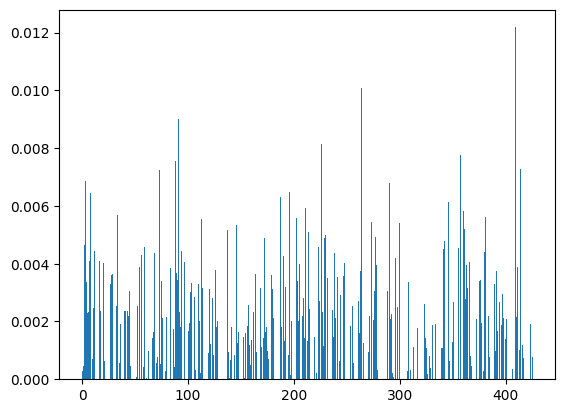

In [23]:
from sklearn.feature_selection import mutual_info_classif
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

min: 0.0
max: 0.012181705013325717


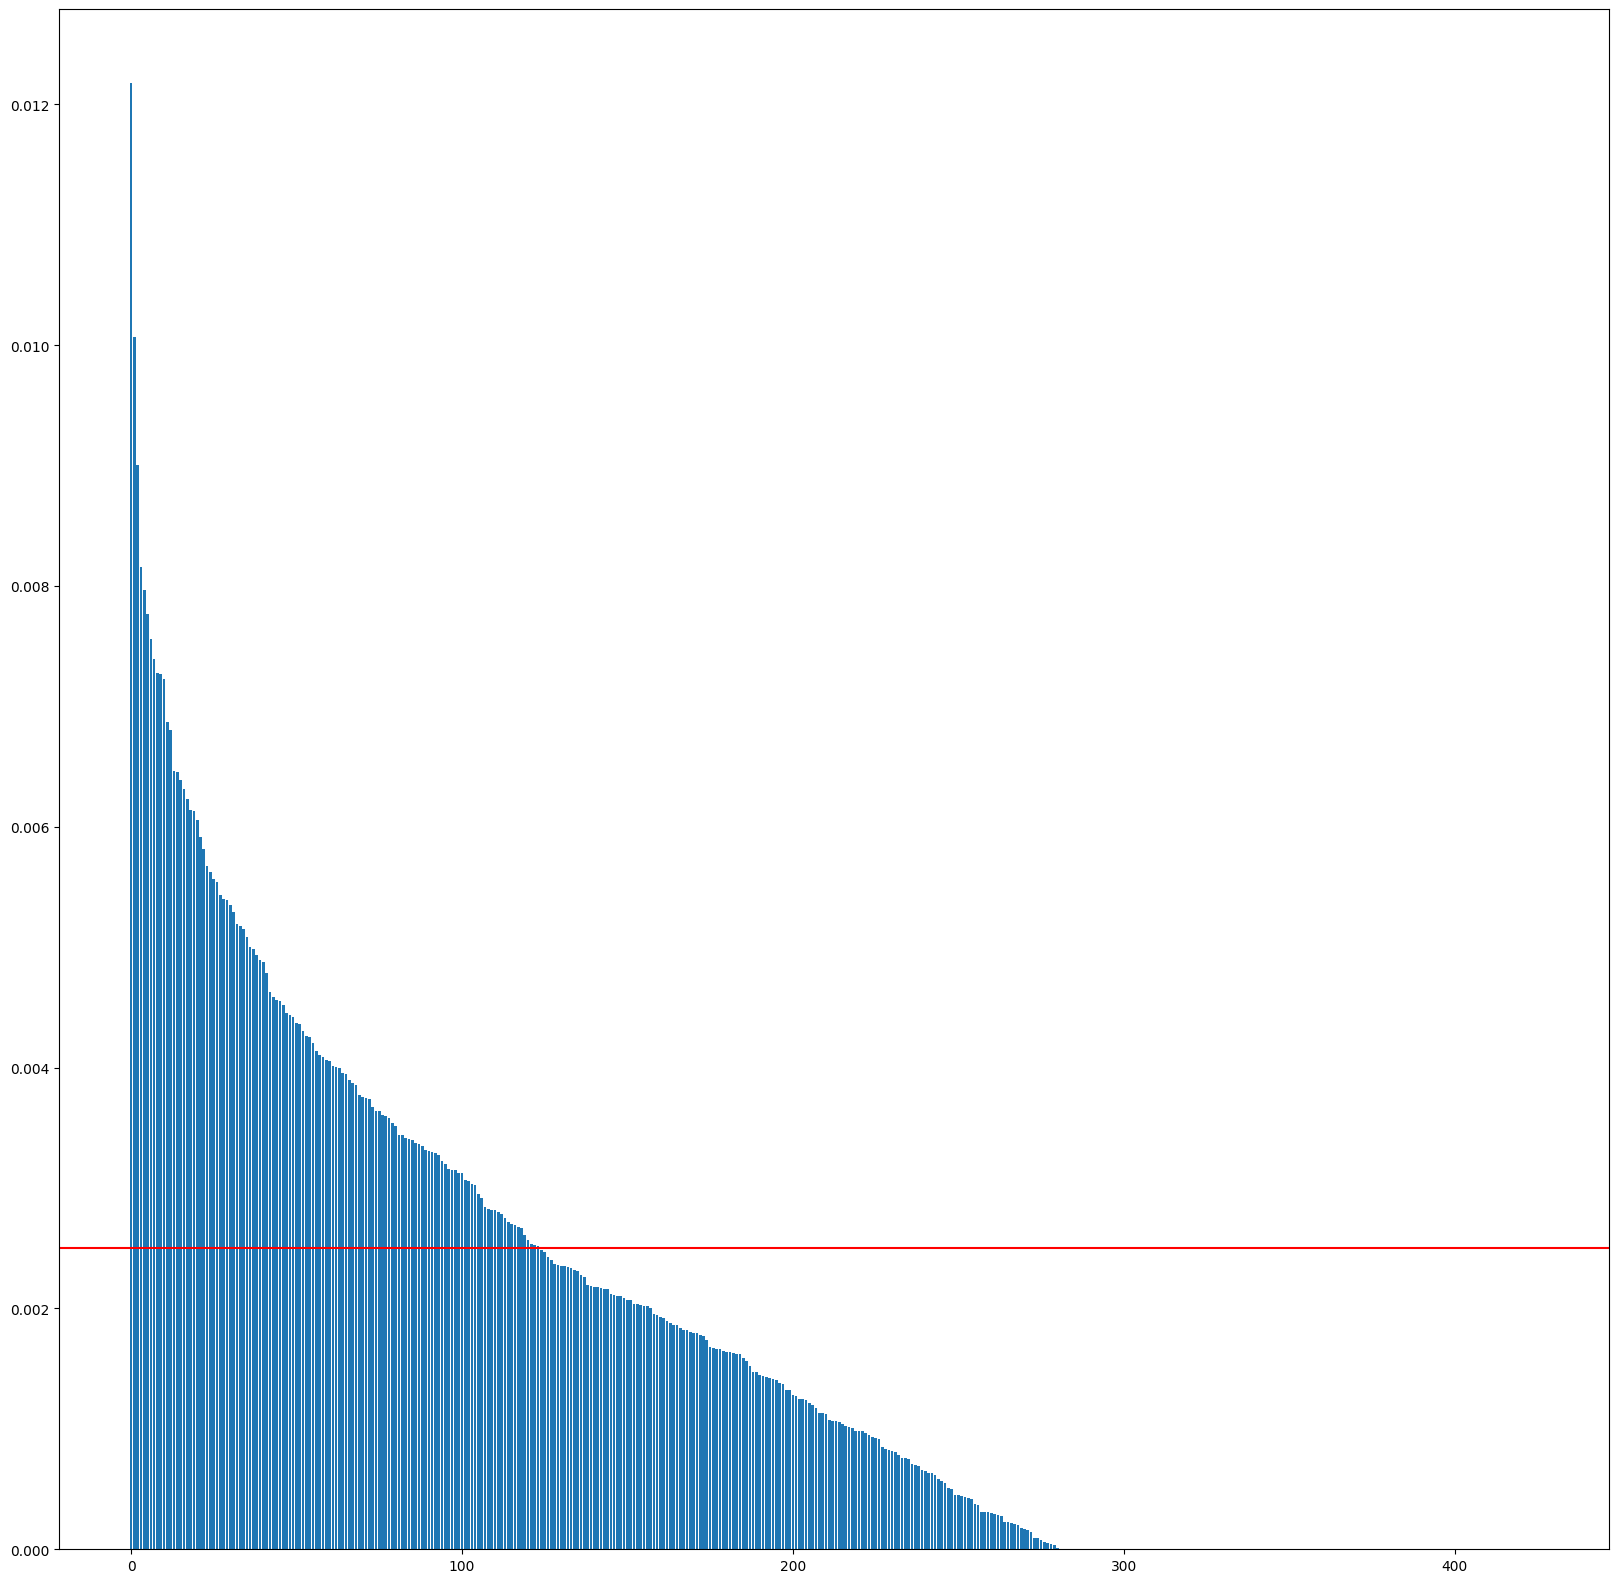

number of features with scores above the threshold: 124


In [24]:
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
print(f"min: {min(scores)}")
print(f"max: {max(scores)}")

# sort the scores in descending order
scores.sort(reverse=True)


threshold = 0.0025
# plot the scores
# draw a vertical line at the threshold
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold])
print(f"number of features with scores above the threshold: {num_features}")


In [25]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)

In [27]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4671374214830539 
test accuracy: 0.8533 
train accuracy: 1.0000 
ROAUC: 0.6834253775749262 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.47      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 3 seconds
average test accuracy: 0.8532835177468027


In [36]:
max2 = max(scores)
min2 = min(scores)
range2 =  max2 - min2
print(f"range: {range2}")

# get the threshold
threshold = min2 + range2 * 0.1
print(f"threshold: {threshold}")

range: 0.012181705013325717
threshold: 0.0012181705013325718


In [59]:
accuracy_scores = []
for i in range(2,10):
    print(f"{i}:\n")
    threshold = range2 * i / 10
    print(f"Threshold: {threshold}")
    num_features = len([sc for sc in scores if sc > threshold])
    print(f"number of features with scores above the threshold: {num_features}")
    if num_features == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold,np.mean(test_accuracies)))

2:

Threshold: 0.002436341002665143
number of features with scores above the threshold: 126
Forest 1/2 trained with 
F1 score: 0.47209134242058615 
test accuracy: 0.8540 
train accuracy: 1.0000 
ROAUC: 0.6975749655408141 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.51      0.47      6959
weighted avg       0.88      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 3 seconds
Forest 2/2 trained with 
F1 score: 0.4681318819651376 
test accuracy: 0.8534 
train accuracy: 1.0000 
ROAUC: 0.6977146228318267 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50   

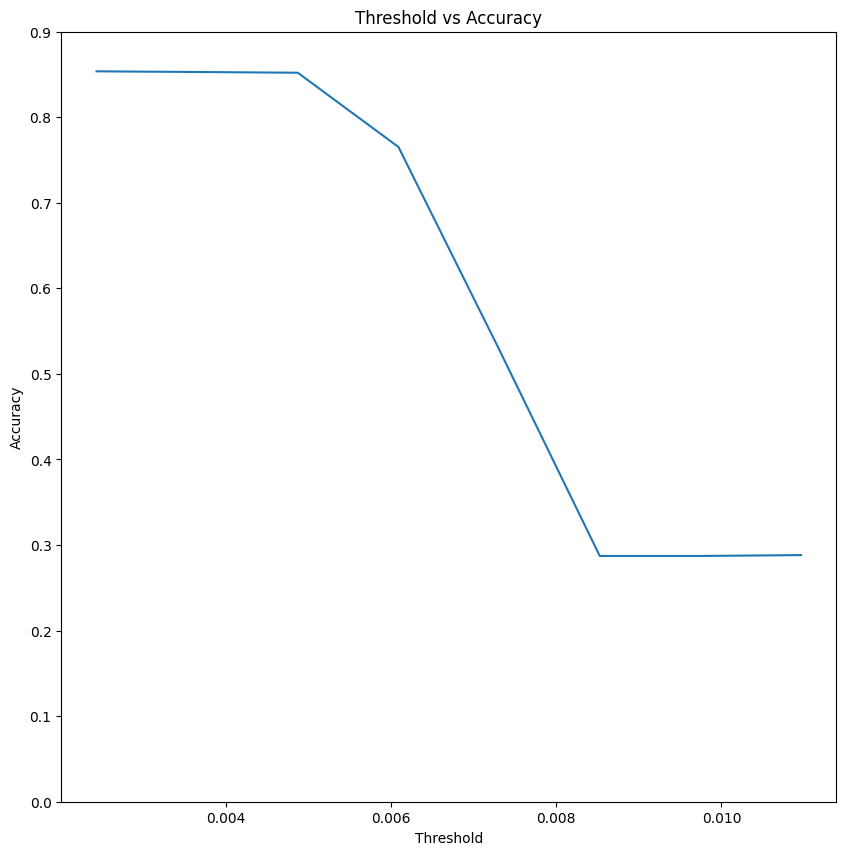

In [60]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
# plt.xticks(np.arange(min([i[0] for i in accuracy_scores]), max([i[0] for i in accuracy_scores])+0.1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [69]:
accuracy_scores = []
prev_num_feat = 0
th = 0.006
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= 0.0005
        continue
    if th < 0.003:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((th,np.mean(test_accuracies)))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= 0.0005

Threshold: 0.006
number of features with scores above the threshold: 21
Forest 1/2 trained with 
F1 score: 0.5142376735453795 
test accuracy: 0.7126 
train accuracy: 0.8252 
ROAUC: 0.5573201742214455 
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      5931
           1       0.17      0.25      0.20      1028

    accuracy                           0.71      6959
   macro avg       0.52      0.52      0.51      6959
weighted avg       0.76      0.71      0.73      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.5211417195555031 
test accuracy: 0.7191 
train accuracy: 0.8292 
ROAUC: 0.5580319917704707 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      5931
           1       0.18      0.26      0.21      1028

    accuracy                           0.72      6959
   macro avg       0.52      0.53      0.52      6959
wei

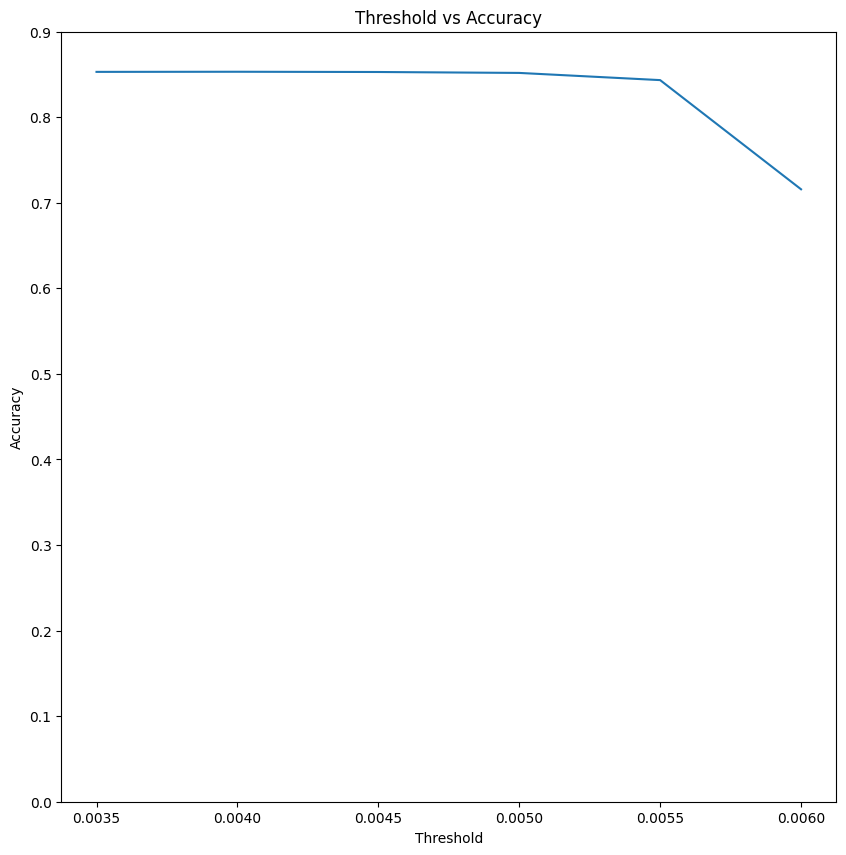

In [72]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in accuracy_scores], [i[1] for i in accuracy_scores])
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

diff: 0.008406380227044097, accuracy: 0.8434401494467596, threshold: 0.0055
diff: 0.001077741054749226, accuracy: 0.8518465296738037, threshold: 0.004999999999999999
diff: 0.00028739761459983804, accuracy: 0.8529242707285529, threshold: 0.004499999999999999
diff: -0.00014369880729991902, accuracy: 0.8532116683431528, threshold: 0.003999999999999998


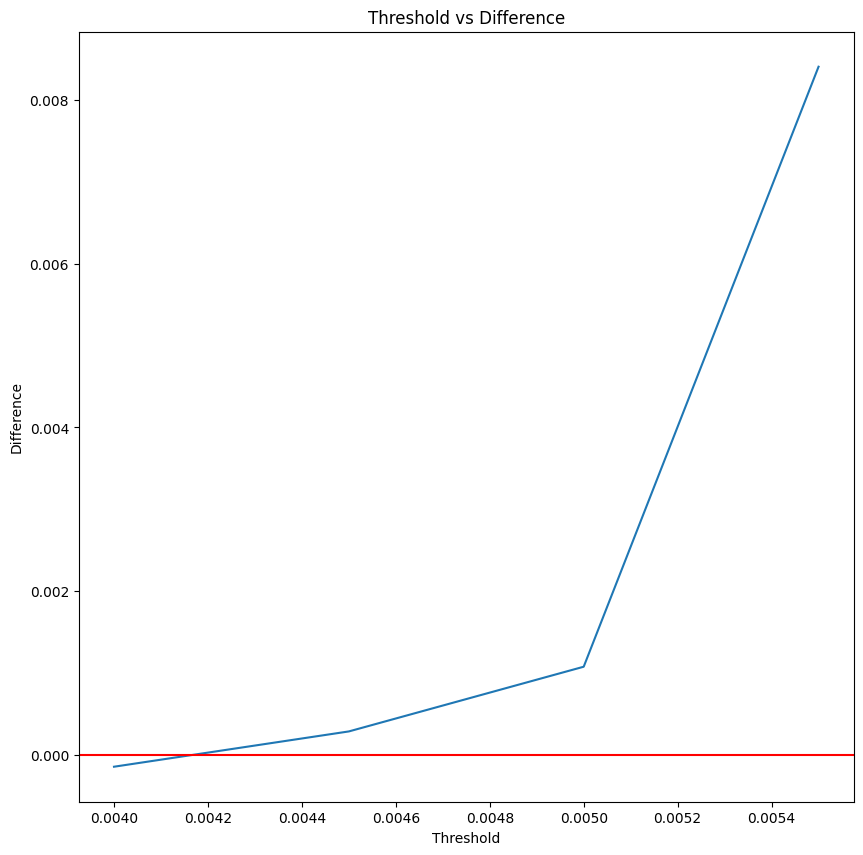

In [71]:
diff = []
for i in range(1,len(accuracy_scores)-1):
    dif = accuracy_scores[i+1][1] - accuracy_scores[i][1]
    print(f"diff: {dif}, accuracy: {accuracy_scores[i][1]}, threshold: {accuracy_scores[i][0]}")
    diff.append((dif,accuracy_scores[i][0]))

# plot the dif
plt.figure(figsize=(10,10))
plt.plot([i[1] for i in diff], [i[0] for i in diff])
# horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Difference')
plt.title('Threshold vs Difference')
plt.show()